In [105]:
import math
import matplotlib.pyplot as plt
import pandas as pd
plt.close('all')
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
directory = 'results/simple_strategy/cache_capacity_2500/2019_05_15_18_33'
caching_strategy_dir = f'{directory}/caching_strategy'
eviction_strategy_dir = f'{directory}/eviction_strategy'
eviction_name = 'lru_eviction_strategy_'

In [113]:
stats_df = pd.read_csv(f'{directory}/cache_hit_logger.log', 
                       names=['timestamp', 'key', 'observation', 'episode'], 
                       usecols=['episode', 'observation', 'key'])
stats = stats_df.groupby(['episode','observation']).count().unstack(0)['key'].fillna(0).transpose()

Text(0, 0.5, 'Hit Ratio')

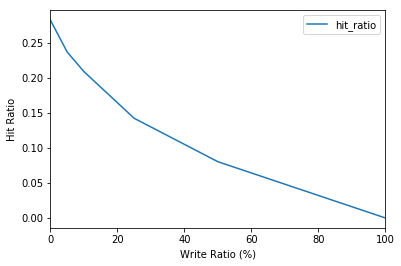

In [114]:
hit_ratio_all = stats['Hit']/stats.sum(axis=1)
hit_ratio_all.index  = hit_ratio_all.index - 1
write_ratio_df = pd.DataFrame({'write_ratio': [0, 5, 10, 25, 50, 100]})
write_ratio_df['hit_ratio'] = hit_ratio_all
write_ratio_df = write_ratio_df.set_index('write_ratio')
ax = write_ratio_df.plot()
ax.set_xlabel('Write Ratio (%)')
ax.set_ylabel('Hit Ratio')

Text(0, 0.5, 'Hit Ratio')

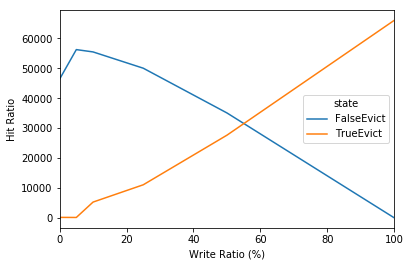

In [120]:
eviction_performance_df = pd.read_csv(f'{eviction_strategy_dir}/{eviction_name}performance_logger.log',
                             names=['timestamp', 'episode', 'state'])
eviction_performance = eviction_performance_df.groupby(['episode','state']).count().unstack(0)['timestamp'].fillna(0).transpose()
eviction_performance.index = [0, 5, 10, 25, 50, 100]
ax = eviction_performance.plot()
ax.set_xlabel('Write Ratio (%)')
ax.set_ylabel('Hit Ratio')